This study aims to compare the performance of two unsupervised machine learning models: Kmeans clustering and Guassian mixture model (GMM).
Little walk on the theories behind these two machine learning models:
KMeans model is based on the minimization of the Euclidean distance between the data points and its cluster centroid.
GMM is based on the maximization of the log likelihood function of the probability of the data points to belong to a cluster represented by its mean and covariance.
The KMeans is good if the data distribution is likely to be in a circle which can be not accurate for other cases; on the other hand, GMM performs well for any given datasets.

In [10]:
import os

filename_path = os.path.abspath('./Python_training')

filename = os.path.join(filename_path,'Clustering_gmm.csv')

In [19]:
cd 

C:\Users\Van Tai Nguyen


In [26]:
cd C:\Users\Van Tai Nguyen\Desktop\Python_training

C:\Users\Van Tai Nguyen\Desktop\Python_training


In [27]:
ls

 Volume in drive C is Windows
 Volume Serial Number is C81E-8626

 Directory of C:\Users\Van Tai Nguyen\Desktop\Python_training

19/10/2020  09:50 AM    <DIR>          .
19/10/2020  09:50 AM    <DIR>          ..
08/09/2019  02:09 PM            50,252 Cambridge English Empower Elementary A2 PDF.jpg
08/09/2019  02:10 PM         3,829,760 cambridge-english-empower-elementary-a2_03b4a9563.iso
08/09/2019  02:10 PM         3,221,534 cambridge-english-empower-elementary-a2_03b4a9563.zip
19/10/2020  09:45 AM            18,385 Clustering_gmm.csv.csv
08/09/2019  03:49 PM    <DIR>          Empower_A2_Elementary_Class_Audio_www.frenglish.ru
07/09/2019  05:43 PM       134,791,694 Empower_A2_Elementary_Class_Audio_www.frenglish.ru.rar
08/07/2019  08:58 PM         3,401,248 libcrypto-1_1.dll
08/07/2019  08:58 PM           688,160 libssl-1_1.dll
08/07/2019  08:54 PM            13,023 LICENSE.txt
05/09/2019  07:54 PM           529,103 medicare-application.pdf
19/07/2020  03:38 PM         4,924,029 ml-1

In [70]:
import pandas as pd
data = pd.read_csv('Clustering_gmm.csv.csv')

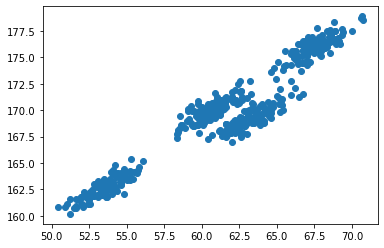

In [31]:
import matplotlib.pyplot as plt
plt.scatter(data['Weight'],data['Height'])

In [32]:
# Importing the Kmeans model
from sklearn.cluster import KMeans

In [34]:
# Determine the kmeans model parameters and fitting data
kmeans = KMeans(n_clusters = 4, verbose = 1)
kmeans.fit(data)

Initialization complete
Iteration 0, inertia 1338.8753519183676
Iteration 1, inertia 1161.9522278545464
Iteration 2, inertia 1140.329076610549
Iteration 3, inertia 1134.4454679346145
Converged at iteration 3: center shift 0.00033994346767404423 within tolerance 0.002499864940648523.
Initialization complete
Iteration 0, inertia 1680.0453530404038
Iteration 1, inertia 1169.3423667437053
Iteration 2, inertia 1147.4985068069716
Iteration 3, inertia 1137.3824043045881
Iteration 4, inertia 1134.6670421440888
Converged at iteration 4: center shift 0.002116611370798492 within tolerance 0.002499864940648523.
Initialization complete
Iteration 0, inertia 2097.5241631407353
Iteration 1, inertia 1151.3769435419422
Iteration 2, inertia 1138.1357391682916
Iteration 3, inertia 1134.6670421440888
Converged at iteration 3: center shift 0.002116611370798492 within tolerance 0.002499864940648523.
Initialization complete
Iteration 0, inertia 1492.1347680993447
Iteration 1, inertia 1244.3255961179777
Iterat

KMeans(n_clusters=4, verbose=1)

In [35]:
# Predicting the results
clusters = kmeans.predict(data)

In [38]:
data['clusters'] = clusters

Text(0.5, 1.0, 'Data distribution')

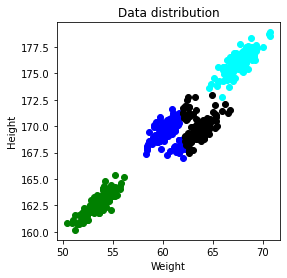

In [43]:
# Plotting the results
colors = ['green', 'blue', 'cyan', 'black']
figure = plt.figure(figsize = (4,4))
for clus in range(0,4):
    data_plot = data[data['clusters']==clus]
    plt.scatter(data_plot['Weight'], data_plot['Height'], c = colors[clus])
    
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data distribution')

As depicted in the above figure the Kmeans model fails to classify the middle two clusters.
Let now try on the Guassian mixture model (GMM)

In [47]:
# Importing the GMM
from sklearn.mixture import GaussianMixture 

In [72]:
# Assigning parameters to the GMM
GMM = GaussianMixture(n_components = 4, verbose = 1)

In [73]:
data.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [74]:
GMM.fit(data)

Initialization 0
  Iteration 10
Initialization converged: True


GaussianMixture(n_components=4, verbose=1)

In [75]:
# Prediction 
preds = GMM.predict(data)
data['clusters_gmm'] = preds

Text(0.5, 1.0, 'Data distribution with GMM classification')

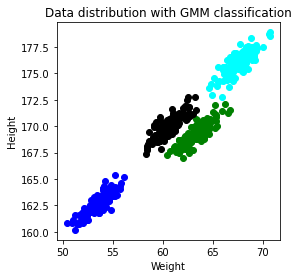

In [76]:
# Plotting
figure_1 = plt.figure(figsize = (4,4))
for num in range(0,4):
    data_plot = data[data['clusters_gmm'] == num]
    plt.scatter(data_plot['Weight'], data_plot['Height'], c = colors[num])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data distribution with GMM classification')

The above figure shows that the GMM model classifies the data more precisely than the Kmeans model